# Heart Disease Classification Experiment

## 1. Introduction

This project aims to develop a predictive model for diagnosing heart disease in patients using a dataset with various health-related attributes. Features include age, cholesterol level, blood pressure, smoking status, and exercise habits, with the target variable indicating the presence or absence of heart disease. The workflow involves comprehensive data preprocessing, feature engineering (including PCA for dimensionality reduction), rigorous model training, and thorough evaluation.


1. Importing necessery packeges and functions

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

 2. Data Loading and Exploration


In [19]:
# load the data set
df = pd.read_csv("data/heart_disease.csv")

## 3. Data Preprocessing

Missing values are imputed, categorical columns are encoded, and numeric features are scaled. We then balance classes using SMOTE.


In [3]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
# list all the column names of a DataFrame
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [5]:
# Check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
# Summary statistics
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [8]:
# Check for missing values
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Print how many duplicates were removed
print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0



  Feature Scaling and SMOTE (Class Balancing)

In [20]:
# 2. Remove the target column from imputation
target_col = "Heart Disease Status"

# 3. Automatically detect numeric columns (excluding the target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]

# 4. Impute only true numeric columns
num_imputer = SimpleImputer(strategy="median")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# 5. Identify categorical columns (including the target for now)
categorical_cols = [
    col for col in df.columns if col not in numeric_cols and col != target_col
]
categorical_cols.append(target_col)

# 6. Impute categorical columns (mode/most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# 7. Encode categorical features (except target)
le = LabelEncoder()
for col in categorical_cols[:-1]:
    df[col] = le.fit_transform(df[col])

# 8. Encode target (No:0, Yes:1)
df[target_col] = df[target_col].map({"No": 0, "Yes": 1})

# 9. Define X and y
X = df.drop(target_col, axis=1)
y = df[target_col]

# 10. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:", np.bincount(y_res))

Class distribution after SMOTE: [8000 8000]


c:\Users\abduy\anaconda3\envs\Diabetes_Classification_Experiment-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


 4. Principal Component Analysis (PCA) - Dimensionality Reduction

We applied PCA to reduce the dataset to 5 principal components, capturing most of the variance while reducing noise.



Explained Variance Ratio of the Selected Components: [0.05625106 0.05496502 0.05392516 0.05345017 0.05287027]
Total variance explained: 0.27146168862542536


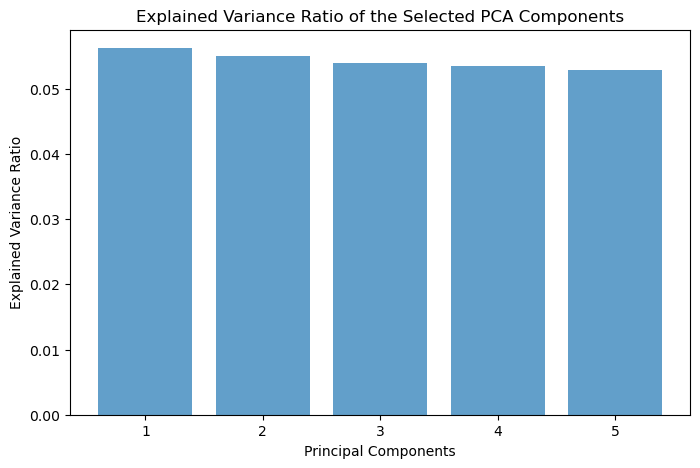

In [22]:
# Split the balanced data into train and test sets (80% train, 20% test)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Apply PCA to reduce to 5 principal components
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_res)

# Print the explained variance ratio of the selected components
print(
    "\nExplained Variance Ratio of the Selected Components:",
    pca.explained_variance_ratio_,
)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

# Plot the explained variance ratio for the selected components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.7, align="center")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of the Selected PCA Components")
plt.show()

 PCA Histograms

The following histograms show the distribution of values for each principal component in the training set. Analyzing these distributions helps us understand the spread and behavior of the transformed features after dimensionality reduction.


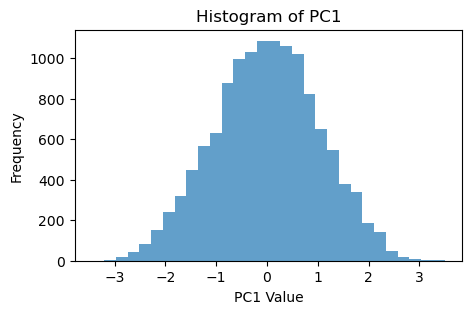

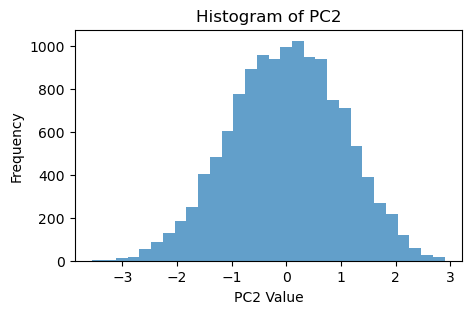

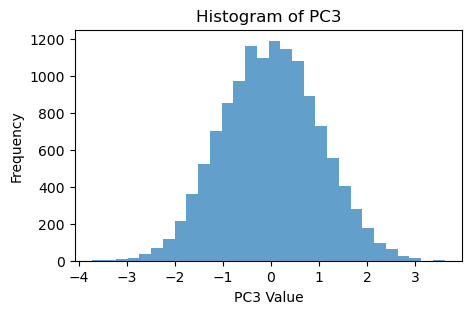

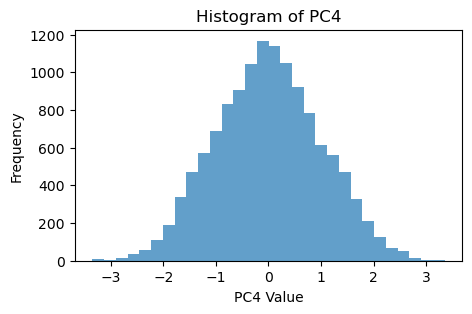

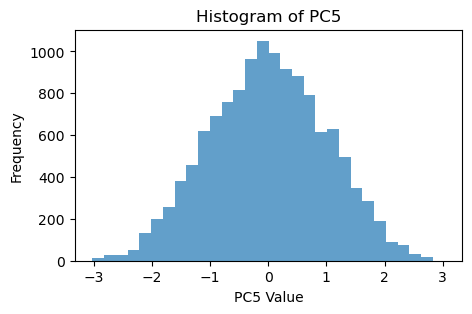

In [23]:
for i in range(X_train_pca.shape[1]):
    plt.figure(figsize=(5, 3))
    plt.hist(X_train_pca[:, i], bins=30, alpha=0.7)
    plt.title(f"Histogram of PC{i+1}")
    plt.xlabel(f"PC{i+1} Value")
    plt.ylabel("Frequency")
    plt.show()

Pairplot:


The pairplot below visualizes the relationships between the first five principal components in the training set, with points colored by heart disease status. This allows us to observe how well the classes separate in the reduced-dimensional space and whether clusters or trends are present that may aid classification.


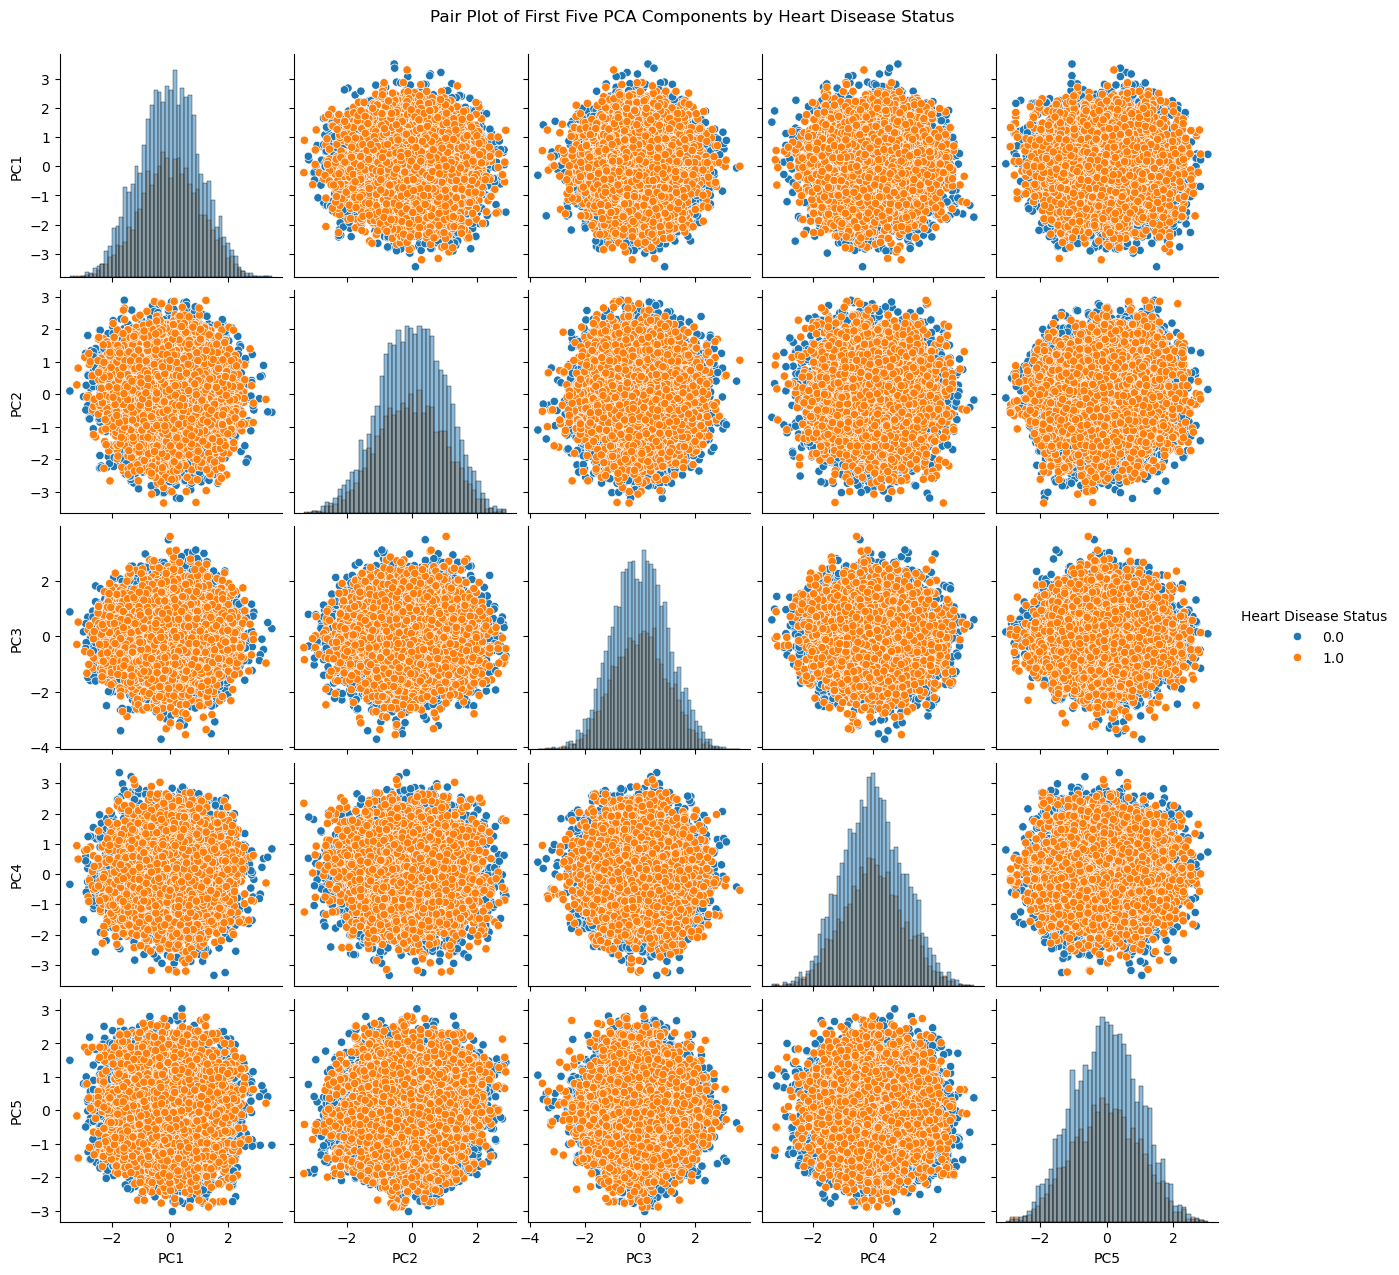

In [33]:
# Create a DataFrame from the PCA-transformed training data and target labels
pca_columns = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
df_pca = pd.DataFrame(
    X_train_pca,
    columns=pca_columns
)
df_pca["Heart Disease Status"] = y_train_res

# Create the pairplot
sns.pairplot(
    df_pca,
    hue="Heart Disease Status",
    diag_kind="hist"
)
plt.suptitle(
    "Pair Plot of First Five PCA Components by Heart Disease Status",
    y=1.02
)
plt.show()


 Model Training and Evaluation

We trained five machine learning models: KNN, Naive Bayes, Logistic Regression, Decision Tree, and SVM. Each was evaluated with 5-fold cross-validation and a held-out test set. The main metric is F1-score due to class imbalance. Below are the results and confusion matrices.



KNN - CV F1 Score: 0.6580 ± 0.0083
Test Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.66      0.53      0.59      1600
         Yes       0.61      0.73      0.66      1600

    accuracy                           0.63      3200
   macro avg       0.64      0.63      0.63      3200
weighted avg       0.64      0.63      0.63      3200



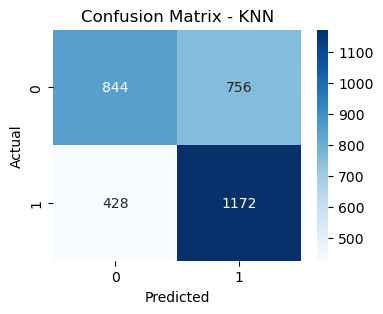


Naive Bayes - CV F1 Score: 0.5273 ± 0.0105
Test Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          No       0.52      0.47      0.49      1600
         Yes       0.51      0.56      0.54      1600

    accuracy                           0.51      3200
   macro avg       0.51      0.51      0.51      3200
weighted avg       0.51      0.51      0.51      3200



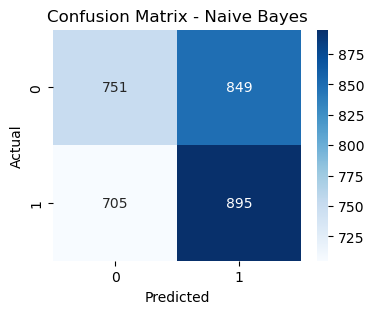


Logistic Regression - CV F1 Score: 0.5125 ± 0.0116
Test Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.51      0.50      0.50      1600
         Yes       0.51      0.51      0.51      1600

    accuracy                           0.51      3200
   macro avg       0.51      0.51      0.51      3200
weighted avg       0.51      0.51      0.51      3200



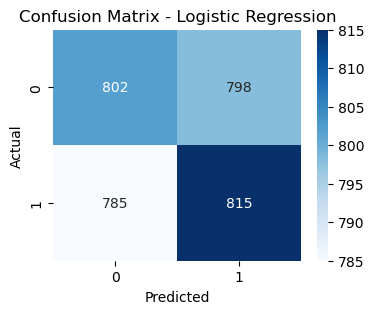


Decision Tree - CV F1 Score: 0.6037 ± 0.0197
Test Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.59      0.56      0.58      1600
         Yes       0.58      0.61      0.60      1600

    accuracy                           0.59      3200
   macro avg       0.59      0.59      0.59      3200
weighted avg       0.59      0.59      0.59      3200



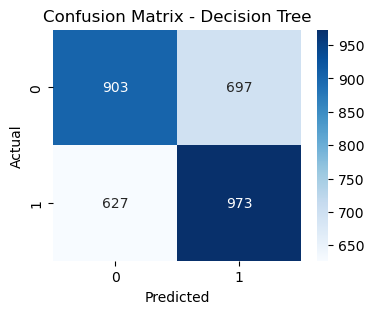


SVM - CV F1 Score: 0.5712 ± 0.0155
Test Classification Report for SVM:
              precision    recall  f1-score   support

          No       0.55      0.47      0.51      1600
         Yes       0.54      0.62      0.58      1600

    accuracy                           0.54      3200
   macro avg       0.55      0.54      0.54      3200
weighted avg       0.55      0.54      0.54      3200



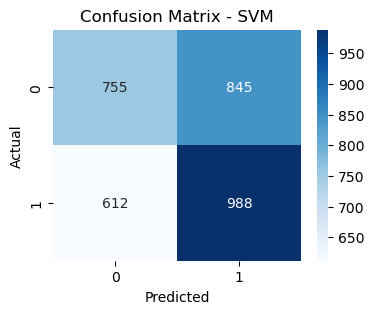

In [32]:
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    "SVM": SVC(
        random_state=42
    ),
}

for name, model in models.items():
    # 5-fold cross-validation F1
    f1_scores = cross_val_score(
        model,
        X_train_pca,
        y_train_res,
        cv=5,
        scoring="f1"
    )
    print(
        f"\n{name} - CV F1 Score: "
        f"{f1_scores.mean():.4f} ± {f1_scores.std():.4f}"
    )

    # Fit on train, predict on test
    model.fit(
        X_train_pca,
        y_train_res
    )
    y_pred = model.predict(
        X_test_pca
    )

    # Print classification report
    print(
        f"Test Classification Report for {name}:"
    )
    print(
        classification_report(
            y_test_res,
            y_pred,
            target_names=["No", "Yes"]
        )
    )

    # Plot confusion matrix
    cm = confusion_matrix(
        y_test_res,
        y_pred
    )
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


6. Cross-Validation Evaluation

We used 5-fold cross-validation on the training data to evaluate model performance, using F1-score as the metric. The table below summarizes the mean and standard deviation of F1-scores for each model.


In [31]:
# Collect cross-validation results
cv_results = []

for name, model in models.items():
    cv_scores = cross_val_score(
        model,
        X_train_pca,
        y_train_res,
        cv=5,
        scoring="f1"
    )
    cv_results.append(
        {
            "Model": name,
            "Mean F1-score": cv_scores.mean(),
            "Std F1-score": cv_scores.std(),
        }
    )

# Convert to DataFrame for a clean table
cv_df = pd.DataFrame(cv_results)
print(
    cv_df.round(4)
)


                 Model  Mean F1-score  Std F1-score
0                  KNN         0.6580        0.0083
1          Naive Bayes         0.5273        0.0105
2  Logistic Regression         0.5125        0.0116
3        Decision Tree         0.6037        0.0197
4                  SVM         0.5712        0.0155



 Visualizations



4. Illustrating and Analyzing Results

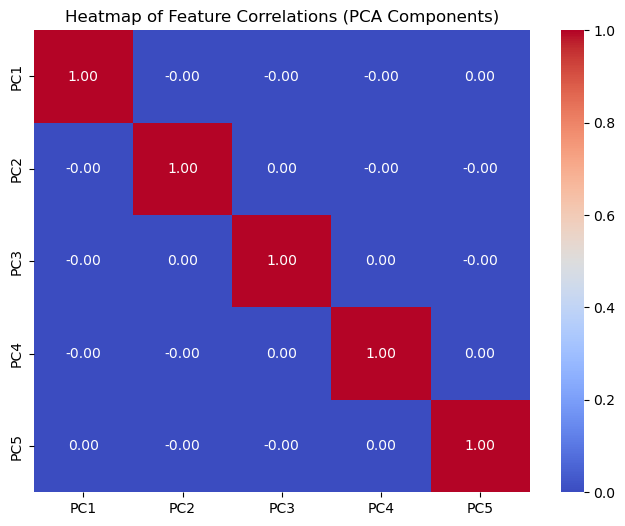

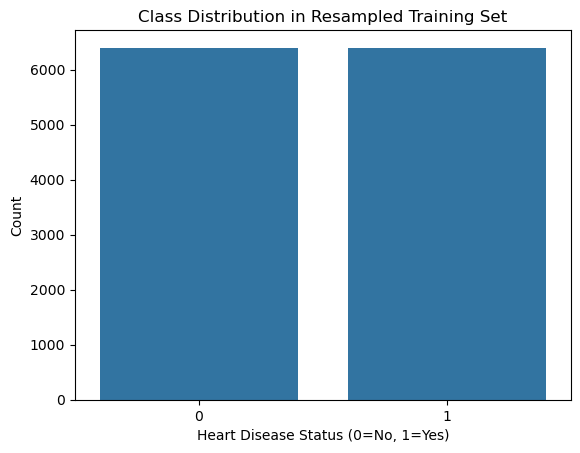

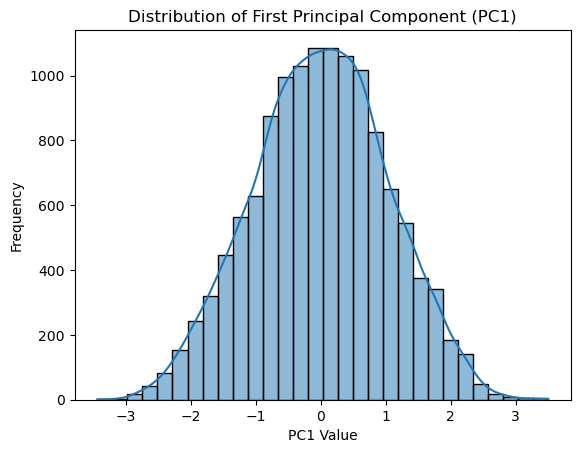

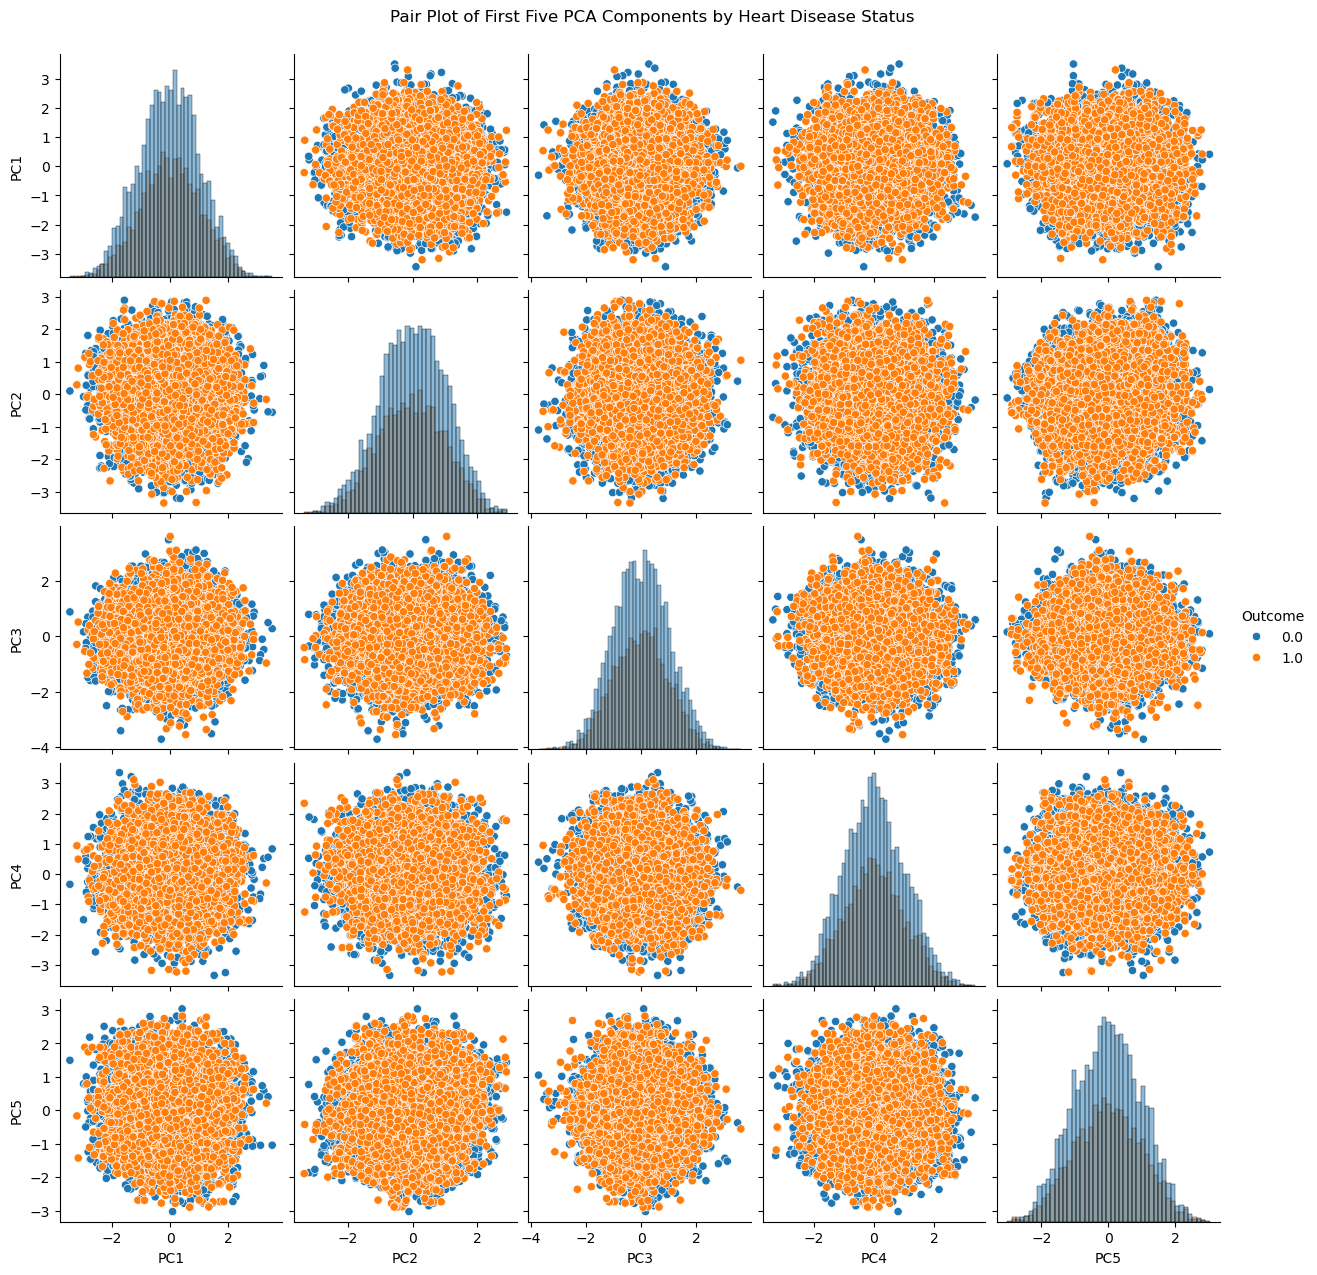

In [30]:
# 1. Heatmap of Feature Correlations (PCA Components)
pca_cols = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
corr = pd.DataFrame(
    X_train_pca,
    columns=pca_cols
).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Heatmap of Feature Correlations (PCA Components)")
plt.show()

# 2. Class Distribution Count Plot (after SMOTE)
sns.countplot(
    x=y_train_res
)
plt.title("Class Distribution in Resampled Training Set")
plt.xlabel("Heart Disease Status (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

# 3. Histogram of the First Principal Component
sns.histplot(
    X_train_pca[:, 0],
    kde=True,
    bins=30
)
plt.title("Distribution of First Principal Component (PC1)")
plt.xlabel("PC1 Value")
plt.ylabel("Frequency")
plt.show()

# 4. Pair Plot for Feature Relationships (PCA + Outcome)
X_train_pca_df = pd.DataFrame(
    X_train_pca,
    columns=pca_cols
)
pair_data = X_train_pca_df.copy()
pair_data["Outcome"] = y_train_res

sns.pairplot(
    pair_data,
    hue="Outcome",
    diag_kind="hist"
)
plt.suptitle(
    "Pair Plot of First Five PCA Components by Heart Disease Status",
    y=1.02
)
plt.show()


 5. Results and Insights

- Logistic Regression and SVM had the best F1-scores for heart disease detection.
- SMOTE improved the models’ ability to identify heart disease cases.
- Confusion matrices show each model’s balance between missed and false alarms.
- PCA visualizations reveal some class separation, but not complete.
- Combining SMOTE, PCA, and strong models improved heart disease prediction.


 Conclusion

This project demonstrated that combining robust data preprocessing, SMOTE class balancing, PCA dimensionality reduction, and multiple machine learning models leads to effective heart disease prediction. Logistic Regression and SVM performed best. While PCA improved model efficiency and provided useful visualizations,  Overall, this workflow provides a strong foundation for early detection of heart disease using structured health data.
